# code_2_MFGP_0 Prerequisite
* Author: Songho Lee
* PI: Seunghwa Ryu
* References
    - https://smt.readthedocs.io/en/latest/index.html
    - https://github.com/SMTorg/smt/tree/master/tutorial#readme
    - https://colab.research.google.com/github/SMTorg/smt/blob/master/tutorial/SMT_Tutorial.ipynb#scrollTo=F9UFzykAyyJE

# Prerequisite 1. SMT Library

In [1]:
# ! pip install smt
# ! pip install imageio

In [ ]:
# https://smt.readthedocs.io/en/latest/index.html

# Prerequisite 2. Forrester function
- Forrester, A., Sobester, A., & Keane, A. (2008). Engineering design via surrogate modelling: a practical guide. Wiley.
- One of the most commonly used kernel functions.

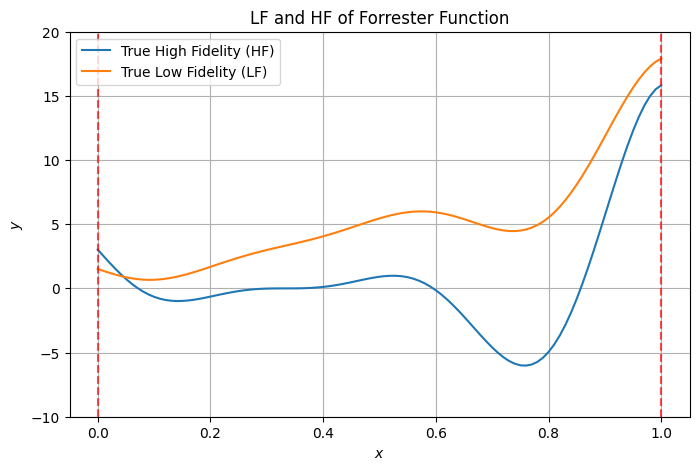

In [1]:
from smt.applications import MFK
import numpy as np
from matplotlib import pyplot as plt
from smt.applications.mfk import NestedLHS
from smt.surrogate_models import KRG
%matplotlib inline

def HF_function(x): # Forrester function
    return ((x * 6 - 2) ** 2) * np.sin((x * 6 - 2) * 2)
def LF_function(x):
    return 0.5 * ((x * 6 - 2) ** 2) * np.sin((x * 6 - 2) * 2) + (x - 0.5) * 10.0 + 5

x = np.linspace(0, 1, 101, endpoint=True).reshape(-1, 1)
y_hf = HF_function(x)
y_lf = LF_function(x)

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x, y_hf, label="True High Fidelity (HF)")
ax.plot(x, y_lf, label="True Low Fidelity (LF)")
ax.axvline(x=0, linestyle="--", color="r", linewidth=1.5, alpha=0.7)
ax.axvline(x=1, linestyle="--", color="r", linewidth=1.5, alpha=0.7)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_title("LF and HF of Forrester Function")
ax.legend(loc='upper left')
ax.grid(True)
ax.set_ylim([-10,20])
plt.show()
plt.close()

# Prerequisite 3. Kriging

___________________________________________________________________________
   
                                  Kriging
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 2
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec):  0.0664883
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 100
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000000
   
   Prediction time/pt. (sec) :  0.0000000
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 2
   
   Predicting ...
   Predicting - done. Time (sec):  0.0009971
   
   Prediction time/pt. (sec) :  0.0004985
   
optimal theta: [20.]


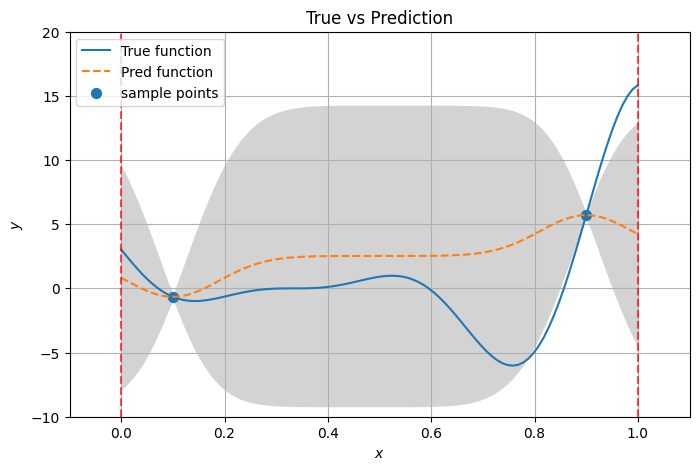

In [23]:
# w/o noise
import matplotlib.pyplot as plt
import numpy as np
from smt.surrogate_models import KRG

def HF_function(x): # Forrester function
    return ((x * 6 - 2) ** 2) * np.sin((x * 6 - 2) * 2)

# Initial
xt = np.array([0.1, 0.9])
yt = HF_function(xt)

sm = KRG(theta0=[1e-2])
sm.set_training_values(xt, yt)
sm.train()

num = 100
x = np.linspace(0.0, 1.0, num)
y = sm.predict_values(x) # mean
s2 = sm.predict_variances(x) # variance
_dydx = sm.predict_derivatives(xt, 0) # derivatives
print("optimal theta:", sm.optimal_theta)

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(x, HF_function(x), label="True function", color="C0", linestyle="-")
ax.plot(x, y, label="Pred function", color="C1", linestyle="--")
ax.fill_between(
    np.ravel(x),
    np.ravel(y - 3 * np.sqrt(s2)),
    np.ravel(y + 3 * np.sqrt(s2)),
    color="lightgrey",
)
ax.scatter(xt, yt, marker="o", label=f"sample points", color="C0", s=50)
ax.axvline(x=0, linestyle="--", color="r", linewidth=1.5, alpha=0.7)
ax.axvline(x=1, linestyle="--", color="r", linewidth=1.5, alpha=0.7)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_title("True vs Prediction")
ax.legend(loc='upper left')
ax.grid(True)
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-10, 20)
plt.show()
plt.close()


___________________________________________________________________________
   
                                  Kriging
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 2
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec):  0.0662858
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 100
   
   Predicting ...
   Predicting - done. Time (sec):  0.0009964
   
   Prediction time/pt. (sec) :  0.0000100
   


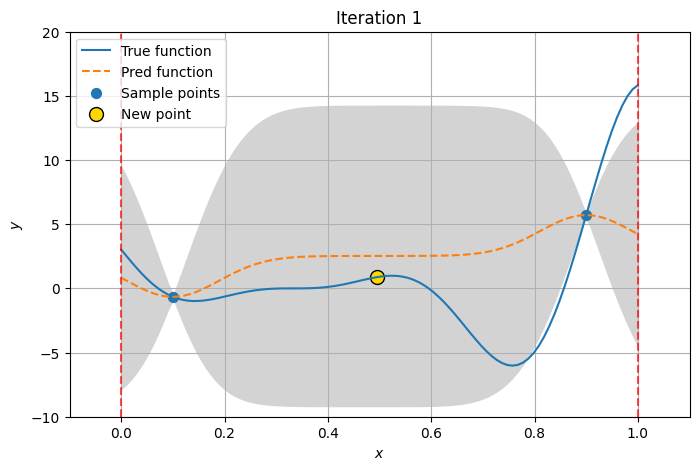

___________________________________________________________________________
   
                                  Kriging
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 3
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec):  0.1393366
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 100
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000000
   
   Prediction time/pt. (sec) :  0.0000000
   


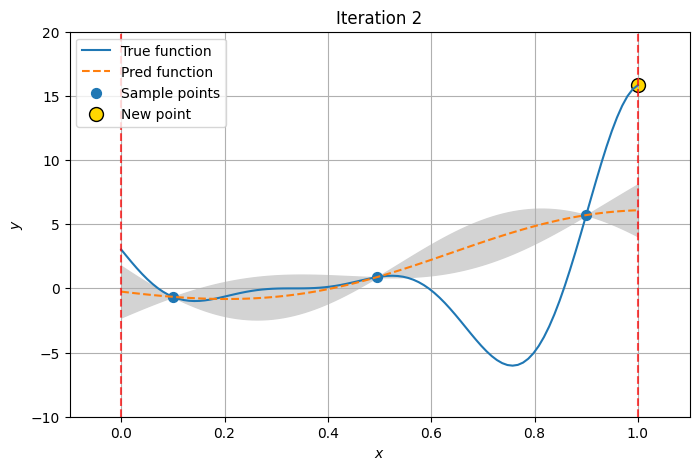

___________________________________________________________________________
   
                                  Kriging
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 4
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec):  0.0440438
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 100
   
   Predicting ...
   Predicting - done. Time (sec):  0.0009971
   
   Prediction time/pt. (sec) :  0.0000100
   


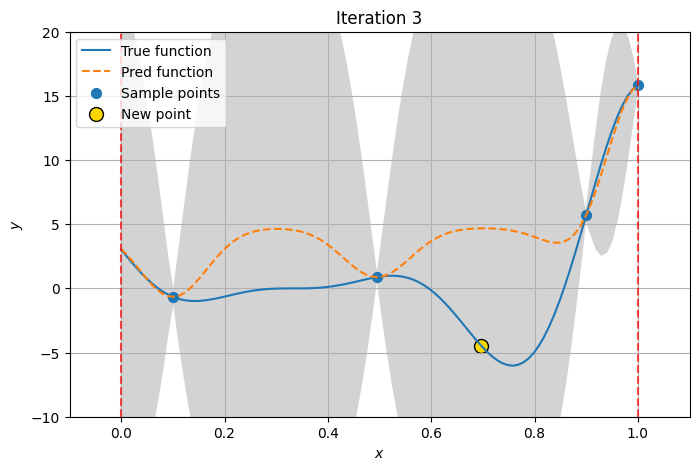

___________________________________________________________________________
   
                                  Kriging
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 5
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec):  0.1479247
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 100
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000000
   
   Prediction time/pt. (sec) :  0.0000000
   


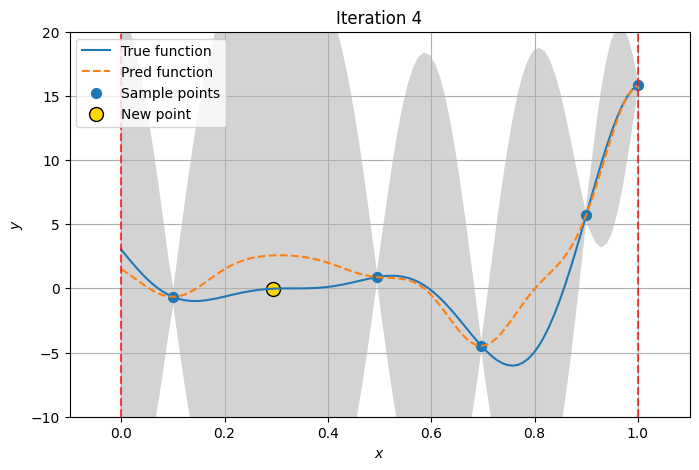

___________________________________________________________________________
   
                                  Kriging
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 6
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec):  0.1355486
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 100
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000000
   
   Prediction time/pt. (sec) :  0.0000000
   


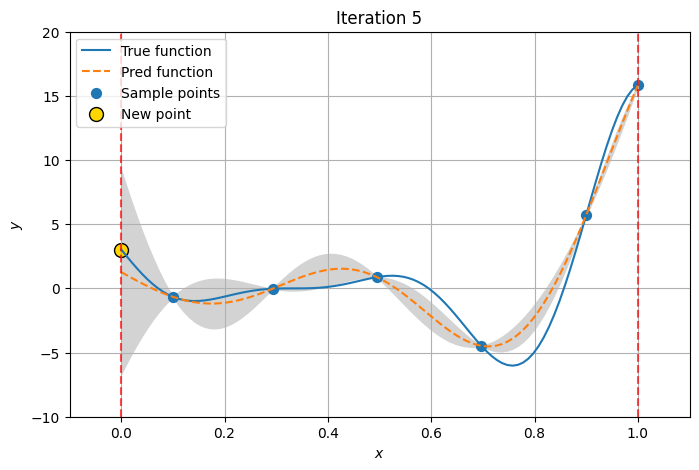

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from smt.surrogate_models import KRG
import imageio

# Define Forrester function
def HF_function(x):
    return ((x * 6 - 2) ** 2) * np.sin((x * 6 - 2) * 2)

# Initialize
xt = np.array([0.1, 0.9])  # Initial sample points
yt = HF_function(xt)
iterations = 5
num = 100
x = np.linspace(0.0, 1.0, num)
gif_images = []

for i in range(iterations):
    # Train Kriging model
    sm = KRG(theta0=[1e-2])
    sm.set_training_values(xt, yt)
    sm.train()
    
    # Predict values and variances
    y = sm.predict_values(x)
    s2 = sm.predict_variances(x)
    
    # Find the index of the highest variance and add corresponding x to xt
    max_var_index = np.argmax(s2)
    new_x = x[max_var_index]
    new_y = HF_function(new_x)
    xt = np.append(xt, new_x)
    yt = np.append(yt, new_y)
    
    # Plot
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.plot(x, HF_function(x), label="True function", color="C0", linestyle="-")
    ax.plot(x, y, label="Pred function", color="C1", linestyle="--")
    ax.fill_between(
        np.ravel(x),
        np.ravel(y - 3 * np.sqrt(s2)),
        np.ravel(y + 3 * np.sqrt(s2)),
        color="lightgrey",
    )
    ax.scatter(xt, yt, marker="o", label=f"Sample points", color="C0", s=50)
    ax.scatter(new_x, new_y, marker="o", label=f"New point", color="gold", edgecolor="k", s=100)
    ax.axvline(x=0, linestyle="--", color="r", linewidth=1.5, alpha=0.7)
    ax.axvline(x=1, linestyle="--", color="r", linewidth=1.5, alpha=0.7)
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$y$")
    ax.set_title(f"Iteration {i+1}")
    ax.legend(loc='upper left')
    ax.grid(True)
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-10, 20)
    
    # Save figure and append to gif_images
    filename = f"iteration_{i+1}.png"
    plt.savefig(filename)
    gif_images.append(filename)
    plt.show()
    plt.close()

from PIL import Image
gif_images = [Image.open(f"iteration_{i+1}.png") for i in range(iterations)]
gif_path = "kriging_iterations.gif"

# GIF 생성
gif_images[0].save(
    gif_path,
    save_all=True,
    append_images=gif_images[1:],  # 첫 이미지를 제외한 나머지 추가
    duration=1000,  # 각 프레임의 지속 시간(ms), 500ms = 0.5초
    loop=0  # 0: 무한 반복, 1: 한 번만 반복
)

___________________________________________________________________________
   
                                  Kriging
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 10
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec):  0.1863904
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 100
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000000
   
   Prediction time/pt. (sec) :  0.0000000
   


C:\Users\Desktop_M4_7\anaconda3\envs\py310smt\lib\site-packages\smt\surrogate_models\krg_based.py:2470: UserWarning: TNC not available yet for noise handling. Switching to Cobyla
  warnings.warn(


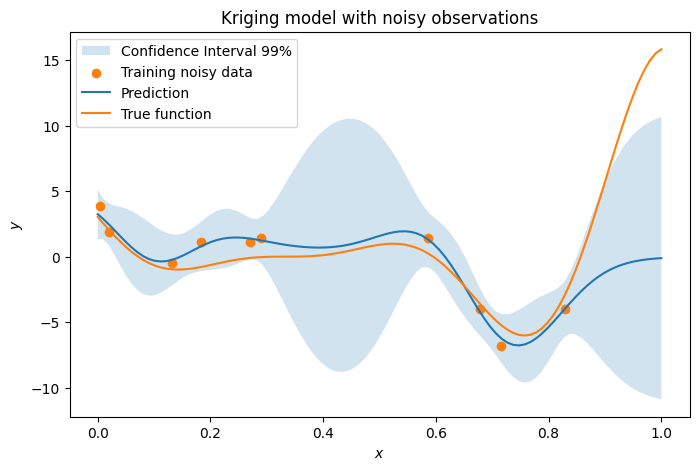

In [54]:
# w/ noise
import matplotlib.pyplot as plt
import numpy as np
from smt.surrogate_models import KRG

# Define Forrester function
def HF_function(x):
    return ((x * 6 - 2) ** 2) * np.sin((x * 6 - 2) * 2)

nobs = 10  # number of obsertvations
xt = np.random.uniform(size=nobs)  # design points
yt = HF_function(xt) + np.random.normal(scale=1, size=nobs) # Observations

# training the model with the option eval_noise= True
sm = KRG(eval_noise=True) # , hyper_opt="Cobyla"
sm.set_training_values(xt, yt)
sm.train()

# predictions
x = np.linspace(0, 1, 100).reshape(-1, 1)
y = sm.predict_values(x)  # predictive mean
var = sm.predict_variances(x)  # predictive variance

# plot
plt.figure(figsize=(8, 5))
plt.fill_between(
    np.ravel(x),
    np.ravel(y - 3 * np.sqrt(var)),
    np.ravel(y + 3 * np.sqrt(var)),
    alpha=0.2,
    label="Confidence Interval 99%",
)
plt.scatter(xt, yt, label="Training noisy data")
plt.plot(x, y, label="Prediction")
plt.plot(x, HF_function(x), label="True function")
plt.title("Kriging model with noisy observations")
plt.legend(loc=0)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.show()
plt.close()